<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/ClassNotebooks/ImageProc_Lecture_wnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! git clone https://github.com/cbishop4/MSE7530

Cloning into 'MSE7530'...
remote: Enumerating objects: 258, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 258 (delta 53), reused 4 (delta 4), pack-reused 165 (from 1)
Receiving objects: 100% (258/258), 9.54 MiB | 11.91 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [3]:
ht_file = '/content/MSE7530/sampledata/glass_adj.png'
phz_file = '/content/MSE7530/sampledata/glass_phase.png'

## Specific Image-Processing Packages we will use today

In [4]:
import skimage as ski
import scipy.ndimage as ndi

Use skimage to load my file

In [5]:
height = ski.io.imread(ht_file)
phase = ski.io.imread(phz_file) # turn pngs into 2D numpy arrays

Text(0.5, 1.0, 'AFM Phase')

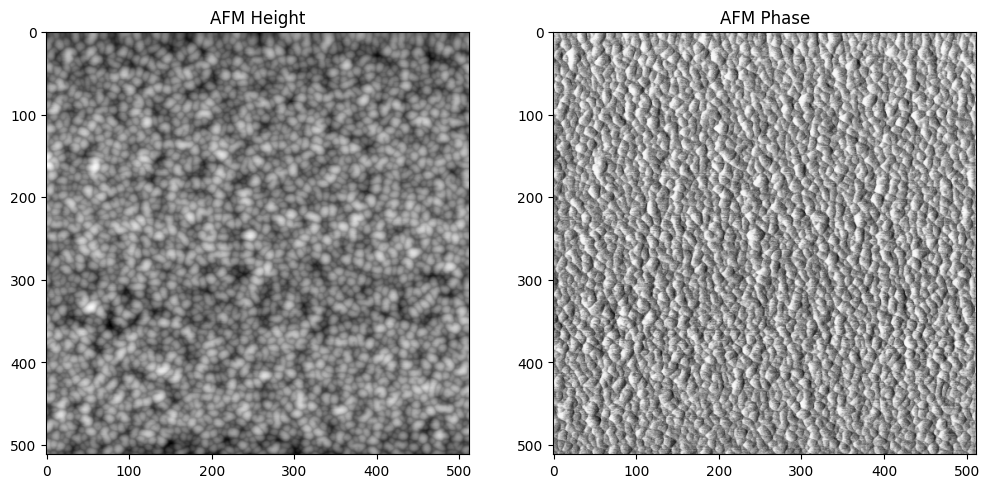

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(height, cmap='gray') # represents the 2D array as something we can see
ax[1].imshow(phase, cmap='gray') # 'gray' is the colormap we use
ax[0].set_title('AFM Height')
ax[1].set_title('AFM Phase')

Optional: Load your image of choice from your drive

In [ ]:
my_image = ski.io.imread(# insert your filename from drive here)

So that you can better see details, we will also make smaller sections of the images

Text(0.5, 1.0, 'AFM Phase')

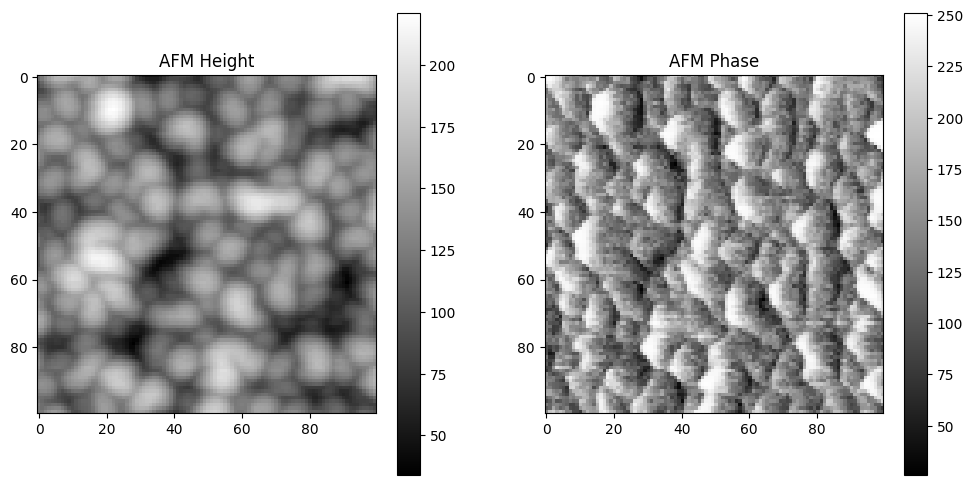

In [12]:
ht_cut = height[100:200, 100:200]
phz_cut = phase[100:200, 100:200]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
cb = ax[0].imshow(ht_cut, cmap='gray') # cb = colorbar
plt.colorbar(cb,ax=ax[0]) # 2nd part of the colorbar command
cb = ax[1].imshow(phz_cut, cmap='gray')
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('AFM Height')
ax[1].set_title('AFM Phase')

Note that the above images go from values of 0 to 255

### Image math example: multiplication and division

These images were stored and loaded in 8-bit color scale, which brings them from 0 to 255 based on how light the pixel is. Let's use image math to restore the two images to their original values.

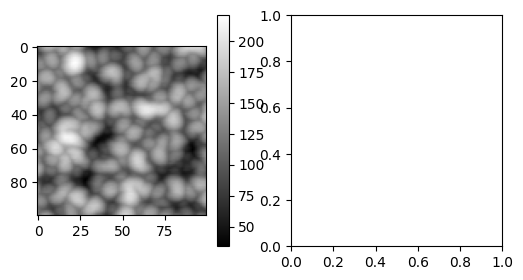

In [15]:
ht_cut = height[100:200, 100:200]
phz_cut = phase[100:200, 100:200]
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
cb = ax[0].imshow(ht_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0])

#### Height  
Assume the maximum height of the height image above is 15 nm, and the minimum height is -13 nm. Transform the axes; we will work this out on the board together.

Step 1. Determine the spread in real heights we need to get back to.

In [16]:
realspread = np.abs(15) + np.abs(-13)
realspread

np.int64(28)

Step 2. Determine the maximum and minimum pixel values in the image (the range)

In [17]:
min_pix = np.min(ht_cut)
max_pix = np.max(ht_cut)
print(min_pix, max_pix)

34 221


Step 3. Find the conversion factor from pixel to nm.

In [18]:
conv = (max_pix - min_pix) / realspread
conv

np.float64(6.678571428571429)

Step 4. Convert the pixel values to nm.

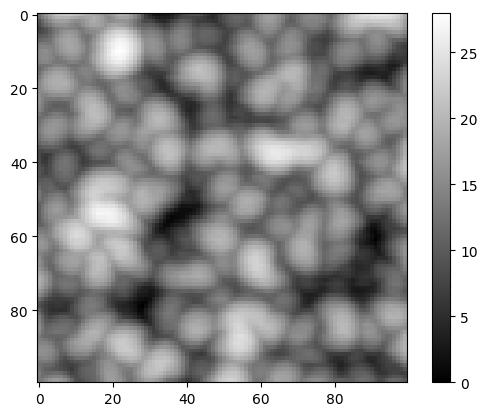

In [22]:
nm_ht = ht_cut / conv
nm_ht = nm_ht - np.min(nm_ht)
plt.imshow(nm_ht,cmap='gray')
plt.colorbar()

In [23]:
print(np.min(nm_ht), np.max(nm_ht))

0.0 27.999999999999996


Subtract a "pedestal" to restore the range from -13 to 15.

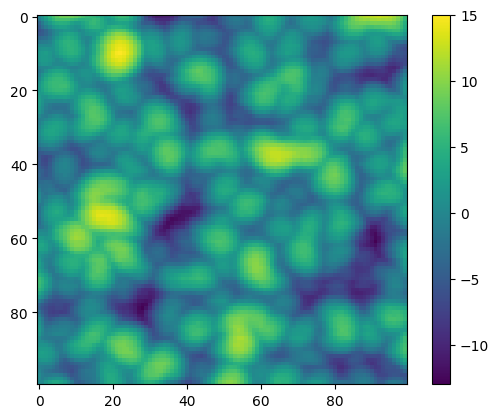

In [24]:
nm_machine = nm_ht - 13
plt.imshow(nm_machine)
plt.colorbar()

In the above, we used multiplication, addition, and subtraction to convert something from pixel values to real scale.

## Thresholding & Binary Images  
We will use simple thresholds to divide up the images and see if we can get individual domains.

In [25]:
threshed_ht = ht_cut > 100
threshed_phz = phz_cut > 100

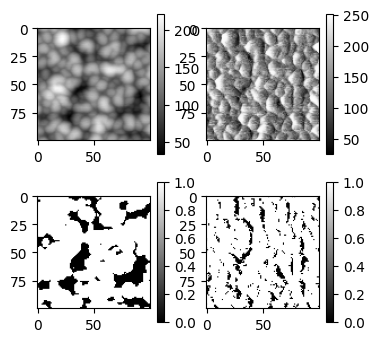

In [27]:
fig, ax = plt.subplots(2,2,figsize=(4,4))
# first plot the original images for reference
cb = ax[0,0].imshow(ht_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,0])
cb = ax[0,1].imshow(phz_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,1])
# now plot the thresholded images
cb = ax[1,0].imshow(threshed_ht,cmap='gray')
plt.colorbar(cb,ax=ax[1,0])
cb = ax[1,1].imshow(threshed_phz,cmap='gray')
plt.colorbar(cb,ax=ax[1,1])

Try adjusting the Threshold and see what makes the "best" result. Why do you think it's the best result? Can we get anything useful? If not, what image features are messing it up?

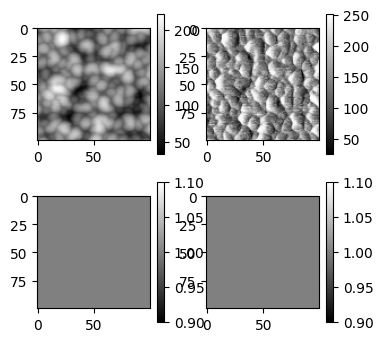

In [29]:
threshed_ht = ht_cut > 0
threshed_phz = phz_cut > 0

fig, ax = plt.subplots(2,2,figsize=(4,4))
# first plot the original images for reference
cb = ax[0,0].imshow(ht_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,0])
cb = ax[0,1].imshow(phz_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,1])
# now plot the thresholded images
cb = ax[1,0].imshow(threshed_ht,cmap='gray')
plt.colorbar(cb,ax=ax[1,0])
cb = ax[1,1].imshow(threshed_phz,cmap='gray')
plt.colorbar(cb,ax=ax[1,1])

## Masking  
Let's start answering the question: do height and phase correspond in any way? Start with a binary thresholded image from above and multiply against the opposite full image.

In [ ]:
threshed_ht = ht_cut > 140
threshed_phz = phz_cut > 180

fig, ax = plt.subplots(2,2,figsize=(10,8))
# first plot the original images for reference
cb = ax[0,0].imshow(ht_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,0])
cb = ax[0,1].imshow(phz_cut, cmap='gray')
plt.colorbar(cb,ax=ax[0,1])
# now plot the thresholded images
cb = ax[1,0].imshow(threshed_ht,cmap='gray')
plt.colorbar(cb,ax=ax[1,0])
cb = ax[1,1].imshow(threshed_phz,cmap='gray')
plt.colorbar(cb,ax=ax[1,1])

In [ ]:
# use the phase mask on the height image
masked_ht = ht_cut * threshed_phz
# use the height mask on the phase
masked_phz = phz_cut * threshed_ht
fig, ax = plt.subplots(1,2,figsize=(10,4))
cb = ax[0].imshow(masked_ht, cmap='gray')
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(masked_phz, cmap='gray')
plt.colorbar(cb,ax=ax[1])

Our results aren't great yet, since we don't have great filters.

## Calculating gradients

We will be using the Numpy gradient (np.gradient) function for this.

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
cb = ax[0].imshow(phz_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(phz_cut)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(phz_cut)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
plt.plot(np.gradient(phz_cut)[0][:,50])
plt.plot(np.gradient(phz_cut)[0][50])

In [ ]:
plt.plot(np.gradient(phz_cut)[1][:,50])
plt.plot(np.gradient(phz_cut)[1][50])

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
cb = ax[0].imshow(ht_cut)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(ht_cut)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(ht_cut)[1])
plt.colorbar(cb,ax=ax[2])
ax[1].axvline(50,color='r')
ax[1].axhline(50,color='r')
ax[2].axvline(50,color='r')
ax[2].axhline(50,color='r')
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
plt.plot(np.gradient(ht_cut)[0][:,50])
plt.plot(np.gradient(ht_cut)[0][50])

In [ ]:
plt.plot(np.gradient(ht_cut)[1][:,50])
plt.plot(np.gradient(ht_cut)[1][50])

### Combining magnitude of the gradient components

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
cb = ax[0].imshow(ht_cut)
plt.colorbar(cb,ax=ax[0])
gx = np.gradient(ht_cut)[0]
gy = np.gradient(ht_cut)[1]
mag = np.sqrt(gx**2 + gy**2)
cb = ax[1].imshow(mag)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Original')
ax[1].set_title('Magnitude')


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
cb = ax[0].imshow(phz_cut)
plt.colorbar(cb,ax=ax[0])
gx = np.gradient(phz_cut)[0]
gy = np.gradient(phz_cut)[1]
mag = np.sqrt(gx**2 + gy**2)
cb = ax[1].imshow(mag)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Original')
ax[1].set_title('Magnitude')


## Smoothing

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
smooth = ndi.gaussian_filter(phz_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(smooth)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(smooth)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
smooth = ndi.gaussian_filter(ht_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(np.gradient(smooth)[0])
plt.colorbar(cb,ax=ax[1])
cb = ax[2].imshow(np.gradient(smooth)[1])
plt.colorbar(cb,ax=ax[2])
ax[0].set_title('Original')
ax[1].set_title('X Gradient')
ax[2].set_title('Y Gradient')

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
smooth = ndi.gaussian_filter(phz_cut,sigma=1)
cb = ax[0].imshow(smooth)
plt.colorbar(cb,ax=ax[0])
gx = np.gradient(smooth)[0]
gy = np.gradient(smooth)[1]
mag = np.sqrt(gx**2 + gy**2)
cb = ax[1].imshow(mag)
plt.colorbar(cb,ax=ax[1])
ax[0].set_title('Original')
ax[1].set_title('Magnitude')

## Threshold this then ROI mask

In [ ]:
newborder_thresh = mag > 25
plt.imshow(newborder_thresh)

In [ ]:
plt.imshow(phz_cut*(1-newborder_thresh))

## Flattening an Image using smoothing

One thing you can do to flatten an image is subtract its overall height fluctuations. Take our full AFM height image:

In [ ]:
plt.imshow(height, cmap='gray')

Now let's use a Gaussian filter to smooth out all of the local fluctuations. You may have to experiment with this a bit.

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
cb = ax[0].imshow(height, cmap='gray')
# smooth it out
smooth_height = ndi.gaussian_filter(height,sigma=1)
cb = ax[1].imshow(smooth_height, cmap='gray')
subtracted = height - smooth_height
cb = ax[2].imshow(subtracted, cmap='gray')


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
cb = ax[0].imshow(height[:50,:50], cmap='gray')
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(smooth_height[:50,:50], cmap='gray')
plt.colorbar(cb,ax=ax[1])
ax[1].imshow(subtracted[:50,:50], cmap='gray')

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
cb = ax[0].imshow(height, cmap='gray')
# smooth it out
smooth_height = ndi.gaussian_filter(height,sigma=5)
cb = ax[1].imshow(smooth_height, cmap='gray')
subtracted = height - smooth_height
cb = ax[2].imshow(subtracted, cmap='gray')

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
cb = ax[0].imshow(height[:50,:50], cmap='gray')
plt.colorbar(cb,ax=ax[0])
cb = ax[1].imshow(smooth_height[:50,:50], cmap='gray')
plt.colorbar(cb,ax=ax[1])
ax[1].imshow(subtracted[:50,:50], cmap='gray')